In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 

all_data = pd.read_csv('all_data.csv')
all_data

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [2]:
# Function used to format axes in $USD Billions 
def format_axes(input_list, scale):
    list_gdp = input_list
    formatted_list = []
    scale = scale.lower()
    if scale == 'billion':
        for item in list_gdp: 
            if (item >= 10**9):
                formatted_list.append(f"${item / 10 ** 9:,.2f} B")
            else: 
                item = '$ 0'
                formatted_list.append(item)
    if scale == 'trillion':
        for item in list_gdp: 
            if (item >= 10**12):
                formatted_list.append(f"${item / 10 ** 12:,.2f} T")
            elif (item >= 10**9):
                formatted_list.append(f"${item / 10 ** 12:,.2f} T")
            else: 
                item = '$ 0'
                formatted_list.append(item)
    return formatted_list

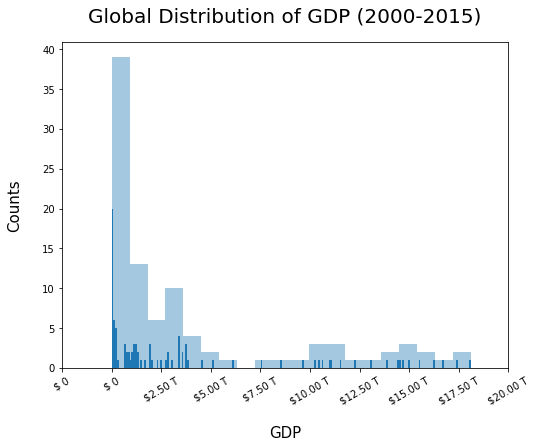

In [52]:
fig, ax = plt.subplots(figsize=(8,6));

plt.hist(all_data['GDP'], bins=200, color='tab:blue');
plt.hist(all_data['GDP'], bins=20, alpha=0.4, color='tab:blue');
axes = list(ax.get_xticks());
formatted_axes = format_axes(axes, 'trillion');
ax.set_xticks(axes);
ax.set_xticklabels(formatted_axes);
ax.tick_params(axis='x', rotation=30)

plt.xlabel('GDP', labelpad=20, size=15);
plt.ylabel('Counts', labelpad=20, size=15);
plt.title('Global Distribution of GDP (2000-2015)', pad=20, size=20);

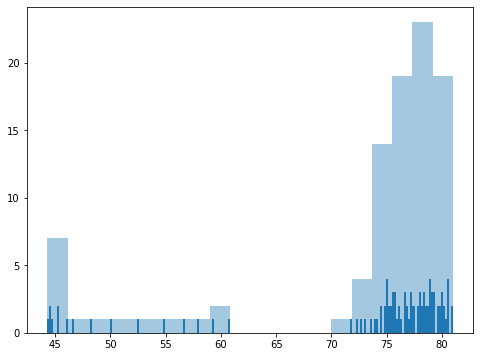

In [59]:
fig, ax = plt.subplots(figsize=(8,6));

plt.hist(all_data['Life expectancy at birth (years)'], bins=200, color='tab:blue');
plt.hist(all_data['Life expectancy at birth (years)'], bins=20, color='tab:blue', alpha=0.4);

axes = list(ax.get_xticks());

In [5]:
test = all_data.groupby('Country')

for name, group in test: 
    print(name)
    print(group)
    print('')

Chile
   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014   

In [6]:
average_gdp = all_data.groupby('Country')['GDP'].mean().reset_index()
average_age = all_data.groupby('Country')['Life expectancy at birth (years)'].mean().reset_index()

countries = list(average_age['Country'])
countries_list = [item.replace('United States of America', 'USA') for item in countries]

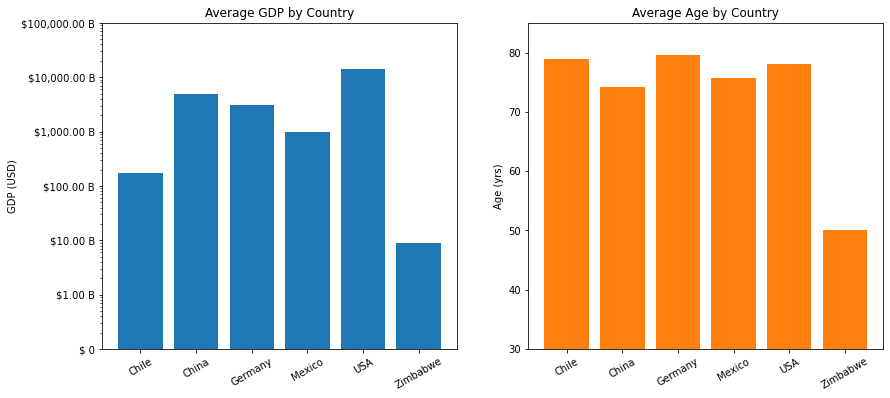

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(average_gdp['Country'], average_gdp['GDP'])
ax[0].set_yscale('log')
ax[0].tick_params(axis='x', rotation=30);
ax[0].set_ylabel('GDP (USD)')

# Format the y-ticks to show $USD in Billions 
ticks = ax[0].get_yticks()
formatted_ticks = format_axes(ticks, 'billion')

ax[0].set_yticks(ticks[:-1])
ax[0].set_yticklabels(formatted_ticks[:-1])

# Set formatted country labels 
ax[0].set_xticks(average_gdp['Country']);
ax[0].set_xticklabels(countries_list);
ax[0].set_title('Average GDP by Country');

ax[1].bar(average_age['Country'], average_age['Life expectancy at birth (years)'], color='tab:orange');
ax[1].tick_params(axis='x', rotation=30);
ax[1].set_xticks(average_gdp['Country']);
ax[1].set_xticklabels(countries_list);
ax[1].set_ylabel('Age (yrs)');
ax[1].set_ylim(30, 85);
ax[1].set_title('Average Age by Country');

This aggregate data suggests that GDP is not a linear predictor of life expectancy across most nations. For example, Chile matains a life expectancy that is three-five years higher than Mexico's despite having only about 20% of Mexico's total GDP. \ 

A similar trend is visible when comparing China and Germany. Although China's GDP is approximately 1.5 times larger than Germany's, its life expectancy remains lower by three-five years. This discrepancy highlights that total national wealth does not translate to superior health outcomes, likely due to differences in population size and distribution of resources.

The relationship may change when looking at developing nations such as Zimbabwe, but this data set lacks depth to test this hypothesis. In these context, initial increases in GDP may translate to gains in life expectancy by addressing basic needs such as sanitation, nutrition, health care and eductation. However, as nations develop beyond these baseline necessities, gains in wealth plateau, suggesting wealth is distributed among certain socioeconomic groups and is not contributing to the broader population. Other factors in longevity in countries that have developed basic necessities are likely driven by lifestyle factors, healthcare efficiency, culutral and social components rather than simple economic reach. \ 

This becomes most evident when comparing USA and Chile. We see the USA GDP is nearly 80 times greater than Chile, yet both countries report similar life expectancy figures. This indicates beyond a certain baseline economic threshold, additional economic growth provides diminishing returns for improvements in longevity for the broader population.  

In [8]:
list_years = list(all_data['Year'].unique())
years = []

for year in list_years:
    if year % 2 == 0:
        years.append(str(year))
    else:
        years.append('')
        
colors = np.array([['gray', 'red', 'black'], 
                 ['tab:green', 'tab:blue', 'tab:orange']])

In [9]:
age_dict = {}
gdp_dict = {}

for name, group in test:
    max_age = group['Life expectancy at birth (years)'].max()
    min_age = group['Life expectancy at birth (years)'].min()
    avg_age = round(group['Life expectancy at birth (years)'].mean(), 2)
    delta_age = abs(group.iloc[0,2] - group.iloc[-1,2])
    age_list = [max_age, min_age, avg_age, delta_age]
    
    max_gdp = group['GDP'].max()
    min_gdp = group['GDP'].min()
    avg_gdp = round(group['GDP'].mean(), 2)
    delta_gdp = abs(group.iloc[0,3] - group.iloc[-1,3])
    gdp_list = [max_gdp, min_gdp, avg_gdp, delta_gdp]
    gdp_list_formatted = format_axes(gdp_list, 'billion')
    
    age_dict[name] = age_list
    gdp_dict[name] = gdp_list_formatted

In [10]:
index_list = ['max.', 'min.', 'avg.', 'diff']


aggregate_age_data = pd.DataFrame(age_dict)
aggregate_age_data.index = index_list

aggregate_gdp_data = pd.DataFrame(gdp_dict)
aggregate_gdp_data.index = index_list

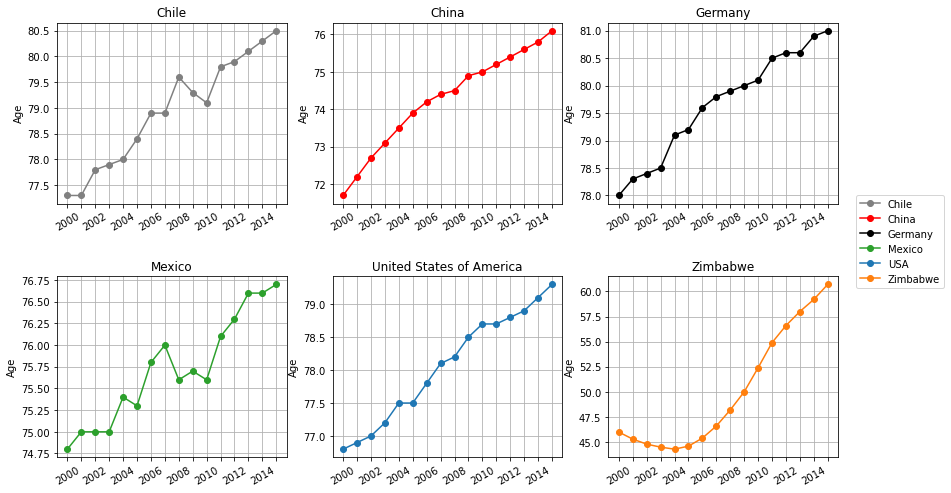

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(14,8))    

i = 0
j = 0

for name, group in test:
    c = colors[i,j]
    ax[i,j].plot(group['Year'], group['Life expectancy at birth (years)'], color=c, marker='o')
    ax[i,j].set_ylabel('Age')
    ax[i,j].set_title(f'{name}')
    ax[i,j].set_xticks(group.Year.unique())
    ax[i,j].set_xticklabels(years)
    ax[i,j].tick_params(axis='x', rotation=30)
    ax[i,j].grid(True)
    j += 1
    if j > 2:
        j = 0
        i += 1
        
plt.subplots_adjust(wspace=0.2, hspace=0.4);
fig.legend(countries_list, loc='center right', bbox_to_anchor=(1.01, 0.5));

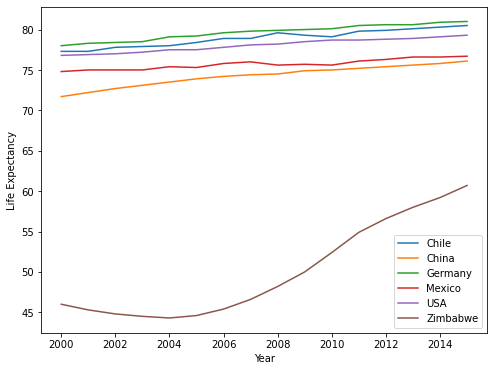

In [43]:
fig, ax = plt.subplots(figsize=(8,6));

for name, group in test: 
    ax.plot(group['Year'], group['Life expectancy at birth (years)'])

plt.legend(countries_list);
plt.xlabel('Year');
plt.ylabel('Life Expectancy');

Life expectnacy increased linearly over time for all six nations. 

Chile : Life expectancy increased by 3 years in a 15 year period \
China : Life expectancy increased by 4 years in a 15 year period \
Germany : Life expectancy increased by 3 years in a 15 year period \
Mexico : Life expectancy increased by 2 years in a 15 year period \
USA : Life expectancy increased by 2.5 years in a 15 year period \
Zimbabwe : Life expectancy increased by 15 years in a 15 year period 

Mexico seems to show the most fluctuation in life expectancy with the smallest increase in Life Expectancy over 15 years, with periods of peaks and throughs - e.g., life expectancy declined by 0.5 year between 2007 and 2010 and sharply increased by 2011. Zimbabwe's life expectancy declined from 2000 - 2004, reaching a minimum and then spiking rapidly. China saw the most consistent growth, growing at a rate of about 0.25 (+life expectancy) per year. 

Global life expenctancy seems to have declined twice, with several countries showing flattening between 2001 - 2003 and another flattened period between 2008 - 2010.

In [12]:
aggregate_gdp_data

,Chile,China,Germany,Mexico,United States of America,Zimbabwe
max.,$278.38 B,"$11,064.70 B","$3,890.61 B","$1,298.46 B","$18,100.00 B",$16.30 B
min.,$69.74 B,"$1,211.35 B","$1,949.95 B",$683.65 B,"$10,300.00 B",$4.42 B
avg.,$169.79 B,"$4,957.71 B","$3,094.78 B",$976.65 B,"$14,075.00 B",$9.06 B
diff,$164.66 B,"$9,853.35 B","$1,425.66 B",$468.61 B,"$7,800.00 B",$9.61 B


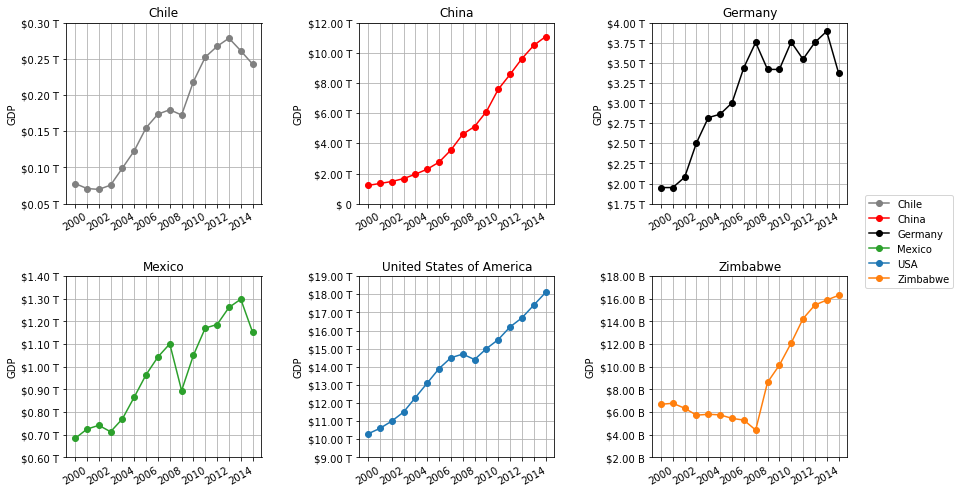

In [61]:
fig, ax = plt.subplots(2, 3, figsize=(14,8))    

i = 0
j = 0

for name, group in test:
    # Find condition for axes formatting 
    temp_array = np.array(group['GDP'])
    if temp_array[0] > 10*(10**9):
        condition = 'trillion'
    else: 
        condition = 'billion'
        
    # Find colour in the colour matrix 
    c = colors[i,j]
    
    # Create plot in the correct axis 
    ax[i,j].plot(group['Year'], group['GDP'], color=c, label=f'{name}', marker='o')
    ax[i,j].set_ylabel('GDP')
    ax[i,j].set_title(f'{name}')
    ax[i,j].set_xticks(group.Year.unique())
    ax[i,j].set_xticklabels(years)
    ax[i,j].grid(True)
    
    # Format y-axis
    lst = list(ax[i,j].get_yticks())
    formatted_list = format_axes(lst, condition)
    ax[i,j].set_yticks(lst)
    ax[i,j].set_yticklabels(formatted_list)
    
    # Rotate x-ticks for better display
    ax[i,j].tick_params(axis='x', rotation=30)
    
    # Change coordinates for grid and colour matrix 
    j += 1
    if j > 2:
        j = 0
        i += 1

# Aesthetic changes - subplot adjustments and legend location
plt.subplots_adjust(wspace=0.5, hspace=0.4);
fig.legend(countries_list, loc='center right', bbox_to_anchor=(1.01, 0.5));

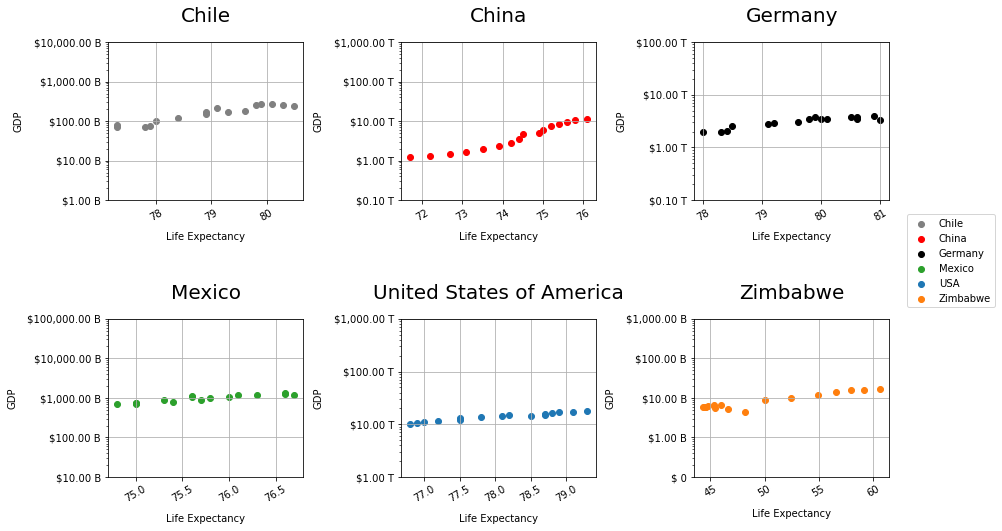

In [83]:
fig, ax = plt.subplots(2, 3, figsize=(14,8))    

i = 0
j = 0

for name, group in test:
    # Find condition for axes formatting 
    temp_array = np.array(group['GDP'])
    if temp_array[0] > (10**12):
        condition = 'trillion'
    else: 
        condition = 'billion'
    
    
    c = colors[i,j]
    ax[i,j].scatter(group['Life expectancy at birth (years)'], group['GDP'], color=c, label=f'{name}', marker='o')
    ax[i,j].set_yscale('log')
    ax[i,j].set_ylabel('GDP', labelpad=10)
    ax[i,j].set_xlabel('Life Expectancy', labelpad=10)
    ax[i,j].set_title(f'{name}', size=20, pad=20)
    ax[i,j].grid(True)
    
    lst = list(ax[i,j].get_yticks())
    formatted_list = format_axes(lst, condition)
    
    ax[i,j].set_yticks(lst)
    ax[i,j].set_yticklabels(formatted_list)
    
    ax[i,j].tick_params(axis='x', rotation=30)
    
    j += 1
    if j > 2:
        j = 0
        i += 1
        
plt.subplots_adjust(wspace=0.5, hspace=0.75);
fig.legend(countries_list, loc='center right', bbox_to_anchor=(1.01, 0.5));

Life Expectancy has increased over the six nations between the years of 2000-2015. \